<IPython.core.display.Javascript object>


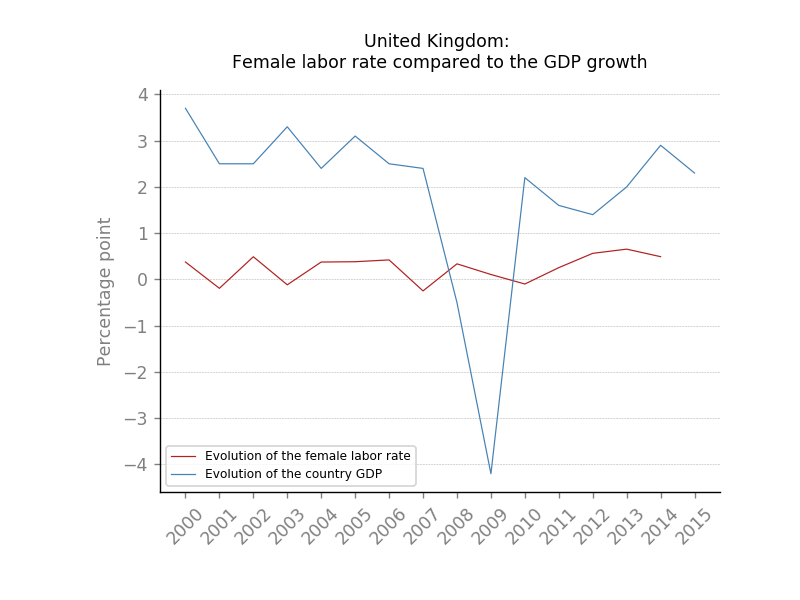

In [64]:
##-----------------------LIBRARY CALL----------------------------##
%matplotlib notebook

import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
from matplotlib import cm

##------------------------FUNCTIONS------------------------------##

def Normalize_Rate():
    global rate
    drate=pd.DataFrame()
    for i in list(range(len(colsR)-2)):
        drate[colsR[i+2]]=rate[colsR[i+2]]-rate[colsR[i+1]]
    drate.index=rate.index
    rate=drate

##----------------------DATA RETRIEVAL--------------------------##

colsR=['Country Name']; colsG=['Country Name']
for i in list(range(0,16)): colsR.append(str(1999+i))
for i in list(range(0,16)): colsG.append(str(2000+i))

rate = pd.read_csv('Female_Labor_Rate.csv',sep=',',header=2,
            usecols= colsR,index_col=0)
Normalize_Rate()
rate=rate.T

gdp = pd.read_excel('GDP_Growth.xlsx',sep=',',header=0,skipfooter=1,names=colsG)
collist=gdp.columns.tolist()[1::]
gdp.replace('..', np.nan,inplace=True)
gdp[collist] = gdp[collist].apply(pd.to_numeric,axis=0) 
gdp=gdp.set_index('Country Name').T

# type(gdp['United Kingdom'][1])
 

##----------------------FIGURE CONSTRUCTION---------------------##

fig, ax = plt.subplots()
fig.subplots_adjust(right=0.9,left=0.2,bottom=0.18,top=0.85)

country='United Kingdom'

plt.plot(rate[country],color='firebrick',linewidth=0.7,fillstyle='left')
plt.plot(gdp[country],color='steelblue',linewidth=0.7)

ax.spines['right'].set_visible(False); ax.spines['right'].set_color('lightgrey')
ax.spines['top'].set_visible(False); ax.spines['top'].set_color('lightgrey')
ax.tick_params(axis='x', colors='grey',labelrotation = (45))
ax.tick_params(axis='y', colors='grey')
# ax.set_xticklabels(rotation = (45), fontsize = 10, va='bottom', ha='left')
plt.ylabel('Percentage point', color='grey')
ax.set_title('United Kingdom: \nFemale labor rate compared to the GDP growth',
            color='k', loc='center',y=1.03,fontsize=10)
ax.legend(['Evolution of the female labor rate',
            'Evolution of the country GDP'],fontsize=7, loc=3)
ax.grid(which='major', axis='y', linestyle='--',linewidth=0.3)

In [74]:
##-----------------------LIBRARY CALL----------------------------##
%matplotlib notebook

import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
from matplotlib import cm
from ipywidgets import widgets, interactive

##------------------------FUNCTIONS------------------------------##

def Normalize_Rate():
    global rate
    drate=pd.DataFrame()
    for i in list(range(len(colsR)-2)):
        drate[colsR[i+2]]=rate[colsR[i+2]]-rate[colsR[i+1]]
    drate.index=rate.index
    rate=drate

def Plot_Figure(country):
    fig, ax = plt.subplots()
    fig.subplots_adjust(right=0.9,left=0.2,bottom=0.18,top=0.85)

    plt.plot(rate[country],color='firebrick',linewidth=0.7,fillstyle='left')
    plt.plot(gdp[country],color='steelblue',linewidth=0.7)

    ax.spines['right'].set_visible(False); ax.spines['right'].set_color('lightgrey')
    ax.spines['top'].set_visible(False); ax.spines['top'].set_color('lightgrey')
    ax.tick_params(axis='x', colors='grey',labelrotation = (45))
    ax.tick_params(axis='y', colors='grey')
    # ax.set_xticklabels(rotation = (45), fontsize = 10, va='bottom', ha='left')
    plt.ylabel('Percentage point', color='grey')
    ax.set_title('{}: \nFemale labor rate compared to the GDP growth'.format(country),
                color='k', loc='center',y=1.03,fontsize=10)
    ax.legend(['Evolution of the female labor rate',
                'Evolution of the country GDP'],fontsize=7, loc=0)
    ax.grid(which='major', axis='y', linestyle='--',linewidth=0.3)
    
    
##----------------------DATA RETRIEVAL--------------------------##

colsR=['Country Name']; colsG=['Country Name']
for i in list(range(0,16)): colsR.append(str(1999+i))
for i in list(range(0,16)): colsG.append(str(2000+i))

rate = pd.read_csv('Female_Labor_Rate.csv',sep=',',header=2,
            usecols= colsR,index_col=0)
Normalize_Rate()
rate=rate.T

gdp = pd.read_excel('GDP_Growth.xlsx',sep=',',header=0,skipfooter=1,names=colsG)
collist=gdp.columns.tolist()[1::]
gdp.replace('..', np.nan,inplace=True)
gdp[collist] = gdp[collist].apply(pd.to_numeric,axis=0) 
gdp=gdp.set_index('Country Name').T

# type(gdp['United Kingdom'][1])
 
##----------------------Dropdown button-------------------------##
country = widgets.Dropdown(options=gdp.columns.tolist(),
    value='Afghanistan',description='Country:')


##----------------------FIGURE CONSTRUCTION---------------------##

interactive(Plot_Figure, country=country)





interactive(children=(Dropdown(description='Country:', options=('Afghanistan', 'Albania', 'Algeria', 'American…

In [117]:
##-----------------------LIBRARY CALL----------------------------##
%matplotlib notebook

import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
from matplotlib import cm
from ipywidgets import widgets, interactive, Layout, GridBox, HBox, VBox

##------------------------FUNCTIONS------------------------------##

def Normalize_Rate():
    global rate
    drate=pd.DataFrame()
    for i in list(range(len(colsR)-2)):
        drate[colsR[i+2]]=rate[colsR[i+2]]-rate[colsR[i+1]]
    drate.index=rate.index
    rate=drate

def Plot_Figure(country,years):
    start_year=years[0]
    end_year=years[1]
    fig, ax = plt.subplots()
    fig.subplots_adjust(right=0.9,left=0.2,bottom=0.18,top=0.85)
    
    rate2=rate[(rate.index >= start_year) & (rate.index <= end_year)]
    gdp2=gdp[(gdp.index >= start_year) & (gdp.index <= end_year)]

    plt.plot(rate2[country],color='firebrick',linewidth=0.7,fillstyle='left')
    plt.plot(gdp2[country],color='steelblue',linewidth=0.7)

    ax.spines['right'].set_visible(False); ax.spines['right'].set_color('lightgrey')
    ax.spines['top'].set_visible(False); ax.spines['top'].set_color('lightgrey')
    ax.tick_params(axis='x', colors='grey',labelrotation = (45))
    ax.tick_params(axis='y', colors='grey')
    plt.ylabel('Percentage point', color='grey')
    ax.set_title('{}: \nFemale labor rate compared to the GDP growth'.format(country),
                color='k', loc='center',y=1.03,fontsize=10)
    ax.legend(['Evolution of the female labor rate',
                'Evolution of the country GDP'],fontsize=7, loc=0)
    ax.grid(which='major', axis='y', linestyle='--',linewidth=0.3)
   
    
##----------------------DATA RETRIEVAL--------------------------##

colsR=['Country Name']; colsG=['Country Name']
for i in list(range(0,16)): colsR.append(str(1999+i))
for i in list(range(0,16)): colsG.append(str(2000+i))

rate = pd.read_csv('Female_Labor_Rate.csv',sep=',',header=2,usecols= colsR,index_col=0)
Normalize_Rate()
rate=rate.T
rate.index=pd.to_numeric(rate.index)

gdp = pd.read_excel('GDP_Growth.xlsx',sep=',',header=0,skipfooter=1,names=colsG)
collist=gdp.columns.tolist()[1::]
gdp.replace('..', np.nan,inplace=True)
gdp[collist] = gdp[collist].apply(pd.to_numeric,axis=0) 
gdp=gdp.set_index('Country Name').T
gdp.index=pd.to_numeric(gdp.index)

 
##----------------------WIDGETS---------------------------------##
country = widgets.Dropdown(options=gdp.columns.tolist(),
    value='Afghanistan',description='Country:')

items_layout = Layout( width='42%') 
years= widgets.FloatRangeSlider( value=[2000, 2015],
    min=2000,max=2015,step=1,description='Years:',
    disabled=False, continuous_update=False,
    orientation='horizontal',readout=True, readout_format='.1f',
    layout=items_layout)

grid=GridBox(children=[country,years],
        layout=Layout(width='100%',
            grid_template_rows='auto',
            grid_template_columns='50% 50%',
            grid_template_areas='country years'))

##----------------------FIGURE CONSTRUCTION---------------------##

plt.style.use('seaborn')

widget=interactive(Plot_Figure, country=country,years=years)
controls = HBox(widget.children[:-1], layout = Layout(flex_flow='row wrap'))
output = widget.children[-1]
display(VBox([controls, output]))




In [115]:
len(gdp.columns.tolist())

217